# 단일선형회귀분석 

1. Python package 로드 및 matplotlib 출력 옵션 설정

In [15]:
import numpy as np
import pandas as pd

In [16]:
from sklearn import linear_model

import numpy as np

import pandas as pd

import matplotlib

import matplotlib.pyplot as plt

%matplotlib inline

matplotlib.style.use('ggplot')

In [2]:
data = {'x' : [13, 19, 16, 14, 15, 14],
        'y' : [40, 83, 62, 48, 58, 43]}
data = pd.DataFrame(data)
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


## 산점도 표현 - scattered

figsize - plot 크기

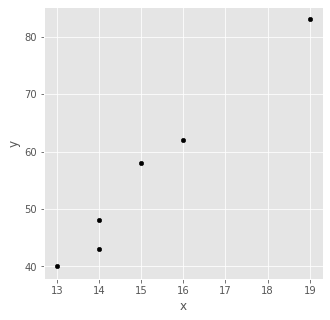

In [3]:
data.plot(kind = "scatter", x = 'x', y = 'y', figsize = (5,5), color = "black")

In [5]:
# 데이터 학습
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X=pd.DataFrame(data["x"]), y = data["y"])
prediction = linear_regression.predict(X = pd.DataFrame(data["x"]))
print('a value = ', linear_regression.intercept_)
print('b balue = ', linear_regression.coef_)

a value =  -55.48175182481753
b balue =  [7.32846715]


In [6]:
# 적합도 검증
#첫 번째 줄은 잔차를 구하는 공식인 실제 값 "y"에서 prediction에 
#저장된 예측 값 y를 빼주어 residuals 변수에 저장한다.
 
residuals = data["y"] - prediction
residuals.describe()

count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [7]:
SSE = (residuals**2).sum()
SST = ((data["y"]-data["y"].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.9753156179610034


In [8]:
# 예측하여 플롯으로 표현

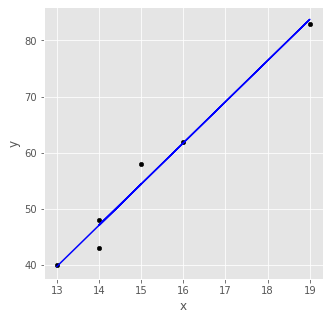

In [9]:
data.plot(kind = "scatter", x = "x", y = "y", figsize = (5, 5), color = "black")

#Plot regression line
plt.plot(data["x"],prediction,color="blue")

In [10]:
#성능 평가

In [12]:
from sklearn.metrics import mean_squared_error

print('score = ', linear_regression.fit(X=pd.DataFrame(data["x"]), y = data["y"]))

print('Mean_Squared_Error = ', mean_squared_error(prediction, data['y']))

print('RMSE = ', mean_squared_error(prediction, data['y']))

print('RMSE = ', mean_squared_error(prediction, data['y'])**0.5)

score =  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean_Squared_Error =  5.172749391727503
RMSE =  5.172749391727503
RMSE =  2.2743679103714736


# Boston Dataset

In [1]:
from sklearn import datasets

boston_house_prices = datasets.load_boston()

print(boston_house_prices.keys())

print(boston_house_prices.data.shape)

print(boston_house_prices.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
print(boston_house_prices.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [9]:
#다음은 보스턴 데이터 셋을 데이터프레임으로 정제하도록 하겠다.
data_frame = pd.DataFrame(boston_house_prices.data)

In [10]:
data_frame.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [11]:
data_frame.columns = [boston_house_prices.feature_names]

In [12]:
boston_house_prices.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [19]:
data_frame['Price'] = boston_house_prices.target
data_frame.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


TypeError: only integer scalar arrays can be converted to a scalar index

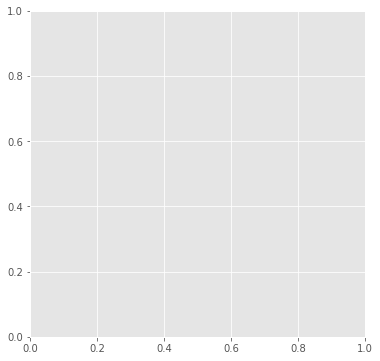

In [20]:
#다음은 산점도 표현에 대한 내용이다.
data_frame.plot(kind="scatter", x="RM", y="Price", figsize=(6,6), color="black", xlim = (4,8), ylim = (10,45))